In [1]:
import pandas as pd
import random
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
import psutil
import optuna
import time
from optuna.samplers import TPESampler
from optuna import Trial
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score, recall_score # 정밀도, 재현률
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, StratifiedKFold, cross_val_score

In [25]:
# 시드고정
class CFG:
    SEED = 42

In [26]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [27]:
# 파일 읽어오기
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')


In [28]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class','father','mother','gender'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id','father','mother','gender'])
        return df_x

In [29]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [30]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [31]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [32]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [33]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
# optuna 적용
#import sklearn

#X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#def objective(trial):
#  param = {
#      "objective":"multi:softprob",
#      "eval_metric":"error",
#     "tree_method":"exact","gpu_id":0,
#      "booster":"gbtree",
#      "verbosity":0,
#     "num_class":3,
#      "max_depth":trial.suggest_int("max_depth", 1, 10),
#      "learning_rate":trial.suggest_uniform("learning_rate",0.0001,0.99),
#      "n_estimators":trial.suggest_int("n_estimators",1000,10000,step=100),
#      "colsample_bytree":trial.suggest_float("colsample_bytree",0.5, 1.0),
#      "colsample_bylevel":trial.suggest_float("colsample_level",0.5, 1.0),
#      "colsample_bynode":trial.suggest_float("colsample_bynode",0.5, 1.0),
#      "reg_lambda":trial.suggest_uniform("reg_lambda",1e-2, 1),
#      "reg_alpha":trial.suggest_uniform("reg_alpha",1e-2, 1),
#    "subsample":trial.suggest_discrete_uniform("subsample",0.6, 1.0, 0.05),
#      "min_child_weight":trial.suggest_int("min_child_weight",2,15),
#    "gamma":trial.suggest_float("gamma",0.0001,1.0,log=True)
#}
# model = XGBClassifier(**param, random_state=42)
# bst = model.fit(X_train, y_train)
# preds = bst.predict(X_validation)
# pred_lables = np.rint(preds)
#  accuracy = sklearn.metrics.accuracy_score(y_validation, pred_lables)
#  return accuracy

#if __name__=="__main__":
  
#  train_start = time.time()
  
#  study = optuna.create_study(direction="maximize")
#  study.optimize(objective, n_trials=1000, show_progress_bar=True)

#  print("Number of finshed trials: ", len(study.trials))
#  print("Best trial:")

#  trial = study.best_trial

#  print("Accuracy:{}".format(trial.value))
#  print(" Best hyperparameters:")
#  for key, value in trial.params.items():
#    print("{}:{}".format(key, value))


#  clf = XGBClassifier(**study.best_params, random_state=42, use_label_encoder=False)
#  clf.fit(X_train, y_train)
#  preds = clf.predict(X_test)
#  accuracy = sklearn.metrics.accuracy_score(y_test, preds)

#  print("Accuracy: {}",format(accuracy))



In [ ]:
# gridsearch 적용
# 하이퍼 파라미터 값 찾기

#from sklearn.model_selection import GridSearchCV

#param_xgb = {"max_depth": [1,2,3,6,8],
#              "min_child_weight" : [1,2,3,4,5],
#              "n_estimators": [1000,1100,1200,1300],
#              'gamma' : [0.00001,0.00001,0.00001, 0.0001, 0.001],
#              'learning_rate': [0.01, 0.02, 0.03,0.04,0.05]
#              } 

#gscv_xgb = GridSearchCV (estimator = XGBClassifier(), param_grid = param_xgb, scoring ='accuracy', cv = 3,
#                         refit=True, n_jobs= 1, verbose=2)
#gscv_xgb.fit(train_x, train_y) 

In [ ]:
#print('XGB 파라미터: ', gscv_xgb.best_params_)
#print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))

In [ ]:
#from sklearn import decomposition

 #줄이고 싶은 차원 수 지정
#pca = decomposition.PCA(n_components=1) 

# X에 오리지널 데이터 넣기
#train_x['PCA'] = pca.fit_transform(train_x) 
#train_x

#test_x['PCA'] = pca.transform(test_x) 
#test_x

In [ ]:
#kmeans_train = train_x
#kmeans = KMeans(n_clusters=3, random_state=42).fit(kmeans_train)
#train_x['cluster'] = kmeans.predict(kmeans_train)
#test_x['cluster'] = kmeans.predict(test_x)
#train_x

In [ ]:
#train_x

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

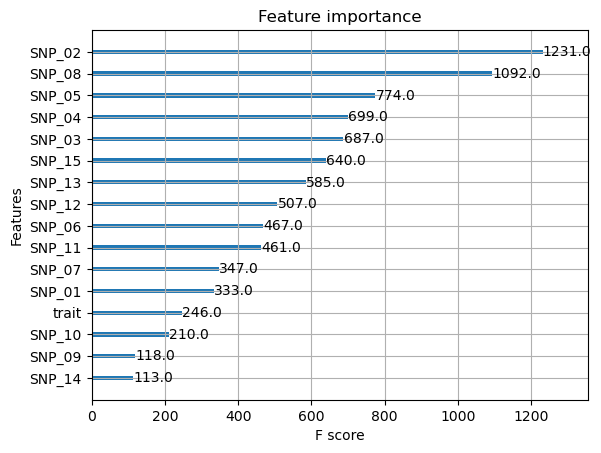

In [35]:
xgb_wrapper = XGBClassifier(booster='gbtree',
                    gamma=1e-05, 
                    max_depth=3, 
                    min_child_weight=1, 
                    n_estimators=1000, 
                    random_state=42, 
                    learning_rate=0.03)  
model = xgb_wrapper.fit(X_train, y_train, eval_metric='merror')
plot_importance(model)

In [17]:
preds = xgb_wrapper.predict(test_x) 
print(preds)

[0 1 2 1 0 1 2 1 0 0 2 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 2 0 1 2
 1 1 2 0 1 2 1 1 1 1 2 1 2 0 1 0 1 1 1 2 0 1 2 0 1 2 2 2 0 1 0 0 1 1 1 0 0
 2 1 2 1 1 1 2 1 0 1 1 1 1 1 2 0 1 1 2 1 1 2 0 1 0 2 0 1 1 2 0 0 2 1 0 1 2
 1 1 1 1 0 0 2 1 2 0 1 1 2 2 1 1 1 0 1 0 0 1 1 1 2 0 0 1 0 0 0 2 1 1 1 0 1
 2 0 0 1 0 1 1 0 0 1 2 0 1 2 2 1 0 0 2 1 1 0 1 2 2 1 1]


In [ ]:
train_x, train_y

In [36]:
preds = xgb_wrapper.predict(X_test)

In [37]:
accuracy_score(y_test, preds)

0.9622641509433962

In [38]:
f1_score(y_test,preds, average= 'micro')

0.9622641509433962

In [39]:
preds = xgb_wrapper.predict(train_x)

In [40]:
accuracy_score(train_y, preds)

0.9923664122137404

In [41]:
f1_score(train_y,preds, average= 'micro')

0.9923664122137404

In [ ]:
submit = pd.read_csv('open/sample_submission.csv')

In [ ]:
submit['class'] = class_le.inverse_transform(preds)

In [ ]:
submit.to_csv('./answer/xgboost40.csv', index=False)